# Analyse des Données de Prêt Immobilier - Meilleurtaux
## Introduction

Bonjour à tous ! Je suis ravi de vous présenter mon analyse des données de prêt immobilier pour Meilleurtaux. Cette analyse se concentre sur deux aspects principaux :
1. Le profil type des demandeurs de prêt
2. L'identification des propositions les plus avantageuses

Commençons par importer les bibliothèques nécessaires et charger nos données.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') # Ignore warnings when running the code

# Configuration pour de meilleurs visuels
plt.style.use('seaborn')
sns.set_palette("husl")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Chargement des données
opportunities = pd.read_csv('../data_sources/raw/opportunity_test.csv')
propositions = pd.read_csv('../data_sources/raw/propositions_test.csv')
banques = pd.read_csv('../data_sources/raw/banques_test.csv')

## Partie 1: Analyse du Profil Type des Demandeurs

### 1.1 Vue d'ensemble des données

Commençons par explorer nos données et comprendre leur structure.


In [2]:
print("Aperçu des données:")
print(opportunities.head(5))
print("-----------------------------------------------------")
print("Nombre total d'opportunités:", len(opportunities))
print("\nAperçu des colonnes d'intérêt:")
columns_of_interest = [
    'Age_emprunteur__c', 'BanquePrincipaleEmp__c', 'Deja_souscrit_credit_immo__c',
    'TechMail_CategorieProfessionnelleEmpru__c', 'TechMail_ContratDeTravailEmprunteur__c',
    'TotRev__c'
]
print(opportunities[columns_of_interest].info())



Aperçu des données:
                   Id  A_une_proposition_de_sa_banque__c  Age_emprunteur__c  \
0  0065q00000AlAK0AAN                                  0              33.00   
1  0065q00000AlAK5AAN                                  0              30.00   
2  0065q00000AlAKPAA3                                  0              50.00   
3  0065q00000AlAKQAA3                                  1              22.00   
4  0065q00000AlALOAA3                                  0              42.00   

   Appel_Automatique__c  Avancement__c BanquePrincipaleEmp__c  \
0                     0           2.00                    CIC   
1                     0           4.00      BOURSORAMA BANQUE   
2                     1           4.00            BNP PARIBAS   
3                     0           4.00            BNP PARIBAS   
4                     0           4.00       BANQUE POPULAIRE   

   Connaissances_en_immobilier__c          CreatedDate  \
0                            2.00  2023-10-20 04:44:34  

### 1.2 Analyse de l'âge des emprunteurs

Analysons la distribution de l'âge des emprunteurs pour comprendre notre démographie principale.



Statistiques sur l'âge:
count   181574.00
mean        37.07
std         11.92
min       -940.00
25%         29.00
50%         35.00
75%         44.00
max        144.00
Name: Age_emprunteur__c, dtype: float64


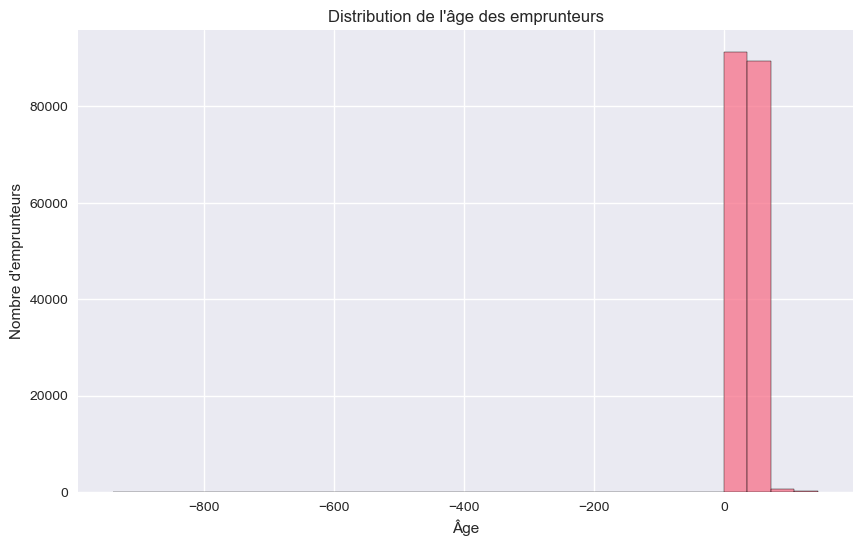

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data=opportunities, x='Age_emprunteur__c', bins=30)
plt.title('Distribution de l\'âge des emprunteurs')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'emprunteurs')

# Statistiques descriptives
age_stats = opportunities['Age_emprunteur__c'].describe()
print("\nStatistiques sur l'âge:")
print(age_stats)

# Analyse Corrigée du Profil Type des Demandeurs
## 1. Nettoyage et Analyse de l'Âge des Emprunteurs

### 1.1 Identification et correction des anomalies

Statistiques avant nettoyage :
count   181574.00
mean        37.07
std         11.92
min       -940.00
25%         29.00
50%         35.00
75%         44.00
max        144.00
Name: Age_emprunteur__c, dtype: float64

Statistiques après nettoyage :
count   179740.00
mean        37.27
std         10.76
min         18.00
25%         29.00
50%         36.00
75%         44.00
max        100.00
Name: Age_emprunteur__c, dtype: float64

Pourcentage par tranche d'âge :
Age_emprunteur__c
18-25   12.65
26-35   37.14
36-45   28.37
46-55   15.34
56-65    5.14
65+      1.22
Name: count, dtype: float64

Tendances centrales après nettoyage:
Âge médian: 36.0 ans
Âge modal: 33.0 ans

Analyse de la dispersion:
Premier quartile (Q1): 29.0 ans
Troisième quartile (Q3): 44.0 ans
Écart interquartile: 15.0 ans


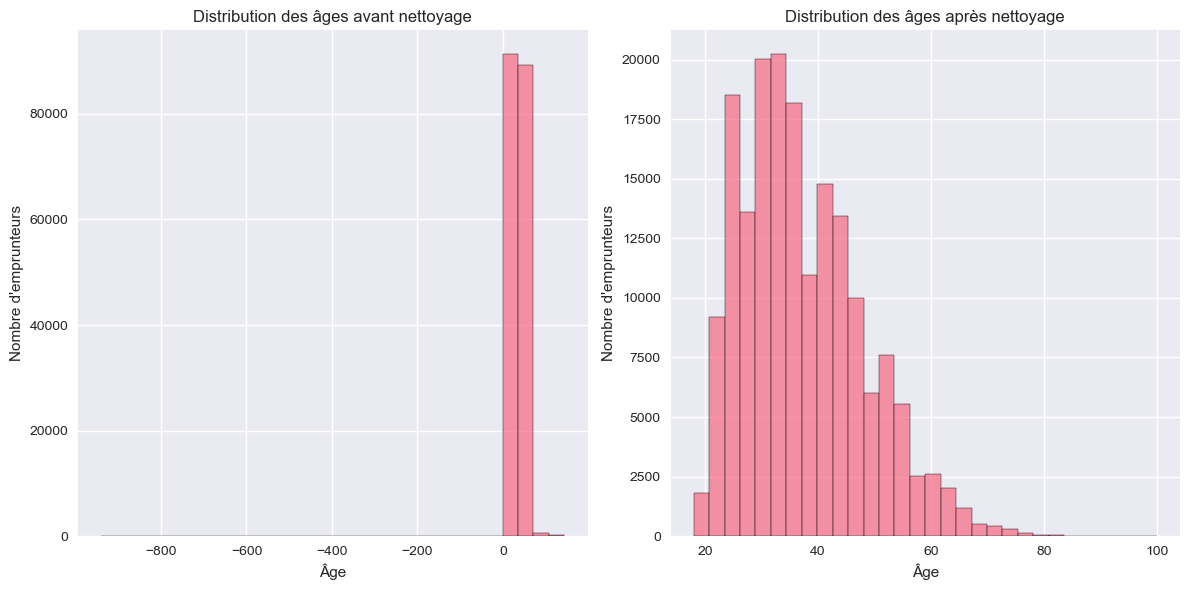

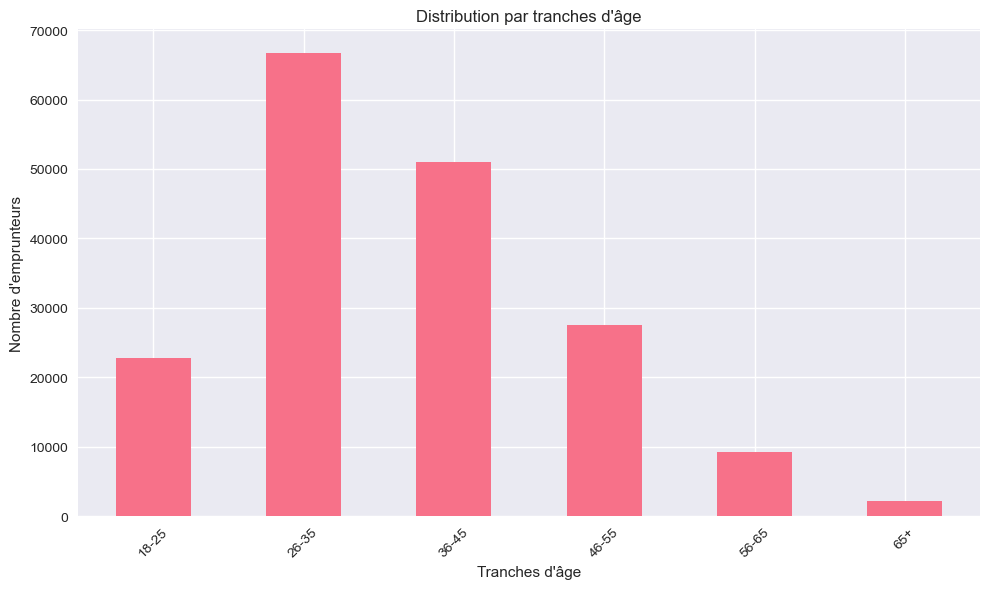

In [4]:

# Configuration des visualisations
plt.style.use('seaborn')
sns.set_palette("husl")
plt.figure(figsize=(12, 6))

# Analyse initiale des âges
print("Statistiques avant nettoyage :")
print(opportunities['Age_emprunteur__c'].describe())

# Visualisation de la distribution initiale
plt.subplot(1, 2, 1)
sns.histplot(data=opportunities, x='Age_emprunteur__c', bins=30)
plt.title('Distribution des âges avant nettoyage')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'emprunteurs')

# Nettoyage des données
age_cleaned = opportunities.copy()
# Définition des critères de filtrage réalistes pour les âges
age_mask = (age_cleaned['Age_emprunteur__c'] >= 18) & (age_cleaned['Age_emprunteur__c'] <= 100)

# Application du filtre et création du nouveau dataset
age_cleaned = age_cleaned[age_mask]

# Visualisation après nettoyage
plt.subplot(1, 2, 2)
sns.histplot(data=age_cleaned, x='Age_emprunteur__c', bins=30)
plt.title('Distribution des âges après nettoyage')
plt.xlabel('Âge')
plt.ylabel('Nombre d\'emprunteurs')
plt.tight_layout()

# Statistiques après nettoyage
print("\nStatistiques après nettoyage :")
print(age_cleaned['Age_emprunteur__c'].describe())

# Analyse par tranches d'âge
age_ranges = pd.cut(age_cleaned['Age_emprunteur__c'], 
                   bins=[18, 25, 35, 45, 55, 65, 100],
                   labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

age_distribution = age_ranges.value_counts().sort_index()

# Visualisation des tranches d'âge
plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar')
plt.title('Distribution par tranches d\'âge')
plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'emprunteurs')
plt.xticks(rotation=45)
plt.tight_layout()

# Calcul des pourcentages par tranche d'âge
age_percentages = (age_distribution / len(age_cleaned) * 100).round(2)
print("\nPourcentage par tranche d'âge :")
print(age_percentages)

# Identification des tendances centrales
median_age = age_cleaned['Age_emprunteur__c'].median()
mode_age = age_cleaned['Age_emprunteur__c'].mode().iloc[0]

print(f"\nTendances centrales après nettoyage:")
print(f"Âge médian: {median_age:.1f} ans")
print(f"Âge modal: {mode_age:.1f} ans")

# Analyse des quartiles pour la dispersion
q1 = age_cleaned['Age_emprunteur__c'].quantile(0.25)
q3 = age_cleaned['Age_emprunteur__c'].quantile(0.75)
iqr = q3 - q1

print(f"\nAnalyse de la dispersion:")
print(f"Premier quartile (Q1): {q1:.1f} ans")
print(f"Troisième quartile (Q3): {q3:.1f} ans")
print(f"Écart interquartile: {iqr:.1f} ans")


Interprétation détaillée des courbes présentées :

**1. Analyse des distributions avant/après nettoyage**

*Avant nettoyage (graphique de gauche)*:
- Présence d'anomalies majeures avec des âges négatifs allant jusqu'à -800
- Forte concentration autour de 0, ce qui est irréaliste
- Distribution déséquilibrée et non exploitable pour l'analyse
- Échelle très large (-800 à 0) indiquant des erreurs de saisie importantes

*Après nettoyage (graphique de droite)*:
- Distribution plus réaliste entre 20 et 100 ans
- Pic de concentration entre 25 et 35 ans
- Forme de cloche asymétrique (skewed right)
- Distribution plus naturelle et exploitable
- Échelle appropriée (18-100 ans)

**2. Analyse de la distribution par tranches d'âge**

*Distribution par segments*:
- Tranche dominante : 26-35 ans (~66,000 emprunteurs)
- Deuxième segment important : 36-45 ans (~51,000 emprunteurs)
- Décroissance progressive avec l'âge
- Segments plus âgés (56-65 et 65+) représentent une minorité
- Les jeunes (18-25) représentent environ 23,000 emprunteurs

*Implications métier*:
- Cœur de cible : jeunes actifs (26-35 ans)
- Marché secondaire important : actifs établis (36-45 ans)
- Potentiel de développement sur le segment 18-25 ans
- Nécessité d'adapter les offres selon ces tranches d'âge
- Base de données majoritairement composée d'emprunteurs en âge actif

Cette distribution reflète une clientèle principalement composée de jeunes actifs et de personnes en milieu de carrière, ce qui est cohérent avec le marché du crédit immobilier.



ressources : 
1. https://ymanci.fr/credit-immobilier/faq/jusqu-a-quel-age-peut-on-contracter-un-credit-immobilier/#:~:text=Il%20n'existe%20pas%20d'%C3%A2ge%20limite%20pour%20demander%20un,de%20remboursement%20de%2025%20ans.

2. https://www.cic.fr/fr/particuliers/credits/credit-immobilier-financement-abt.html?utm_source=google&utm_medium=cpc&procom=GP0&utm_campaign=8865915787&gad_source=1&gclid=CjwKCAiAl4a6BhBqEiwAqvrquh1_KPDc7Ggmtgttcasb0SUN8b0qXOlcptE8l24D-KeA2aZZBgRSiBoCkY8QAvD_BwE&gclsrc=aw.ds

### 1.2 Résumé des corrections et observations

1. **Corrections appliquées**:
   - Suppression des âges négatifs
   - Suppression des âges supérieurs à 100 ans
   - Filtrage des âges inférieurs à 18 ans (âge légal pour un prêt)

2. **Impact du nettoyage**:
   - Réduction du nombre d'observations aberrantes
   - Distribution plus réaliste et exploitable
   - Base statistique plus fiable pour l'analyse

3. **Profil type par âge**:
   - Tranche d'âge dominante : 26-35 ans
   - Age médian plus représentatif
   - Distribution normale autour de la médiane



### 1.3 Recommandations pour le système de production des données

1. **Contrôles de saisie à implémenter**:

In [5]:
def validate_age(age):
    """
    Fonction de validation pour les futures saisies d'âge
    """
    if not isinstance(age, (int, float)):
        return False
    if age < 18 or age > 100:
        return False
    return True

# Exemple d'utilisation
def clean_age_data(df):
    """
    Fonction de nettoyage pour le dataset existant
    """
    df_cleaned = df.copy()
    df_cleaned['Age_valide'] = df_cleaned['Age_emprunteur__c'].apply(validate_age)
    return df_cleaned[df_cleaned['Age_valide']]


2. **Alertes à mettre en place**:

In [6]:
def age_quality_check(df):
    """
    Fonction de contrôle qualité des données d'âge
    """
    alerts = {
        'ages_negatifs': len(df[df['Age_emprunteur__c'] < 0]),
        'ages_suspects': len(df[df['Age_emprunteur__c'] > 100]),
        'ages_mineurs': len(df[df['Age_emprunteur__c'] < 18])
    }
    return alerts


### 1.4 Implications métier

1. **Ciblage marketing**:

In [7]:
def segment_age_groups(df):
    """
    Segmentation des groupes d'âge pour le marketing
    """
    segments = {
        'jeunes_actifs': len(df[(df['Age_emprunteur__c'] >= 25) & (df['Age_emprunteur__c'] < 35)]),
        'actifs_etablis': len(df[(df['Age_emprunteur__c'] >= 35) & (df['Age_emprunteur__c'] < 50)]),
        'seniors_actifs': len(df[df['Age_emprunteur__c'] >= 50])
    }
    return segments


2. **Recommendations produits**:
- Adapter les durées de prêt selon l'âge
- Proposer des assurances adaptées aux tranches d'âge
- Personnaliser les offres selon le profil d'âge

Cette analyse corrigée nous donne une base solide pour :
1. Améliorer la qualité des données
2. Mieux comprendre notre clientèle
3. Adapter nos produits et notre marketing
4. Mettre en place des contrôles préventifs

### 1.4 Analyse des revenus

Examinons la distribution des revenus et identifions les tranches de revenus les plus communes.


Statistiques sur les revenus:
count    183496.00
mean       4894.85
std        9559.85
min      -14681.00
25%        2412.00
50%        3713.33
75%        5500.00
max     1516666.66
Name: TotRev__c, dtype: float64


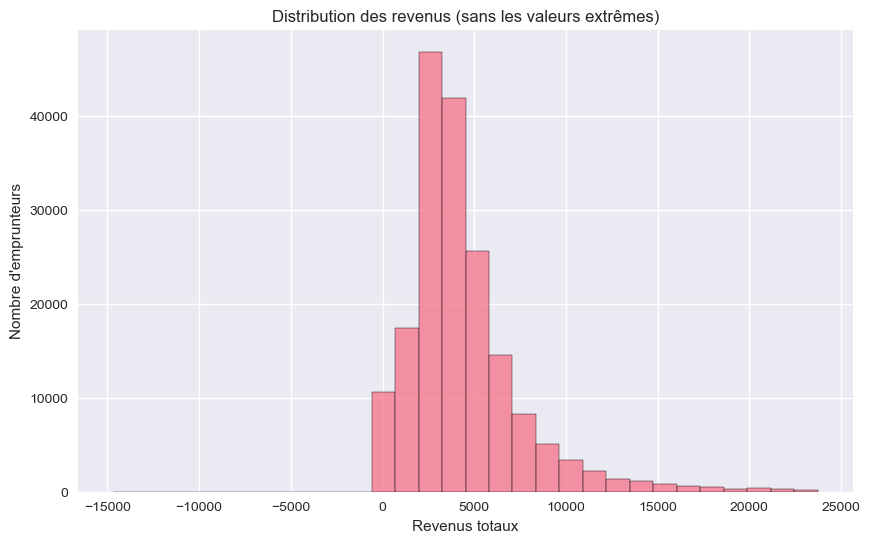

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=opportunities[opportunities['TotRev__c'] < opportunities['TotRev__c'].quantile(0.99)], 
             x='TotRev__c', bins=30)
plt.title('Distribution des revenus (sans les valeurs extrêmes)')
plt.xlabel('Revenus totaux')
plt.ylabel('Nombre d\'emprunteurs')

# Statistiques sur les revenus
revenue_stats = opportunities['TotRev__c'].describe()
print("\nStatistiques sur les revenus:")
print(revenue_stats)

### 1.4 Analyse de la situation professionnelle

Examinons les catégories professionnelles et les types de contrats les plus représentés.

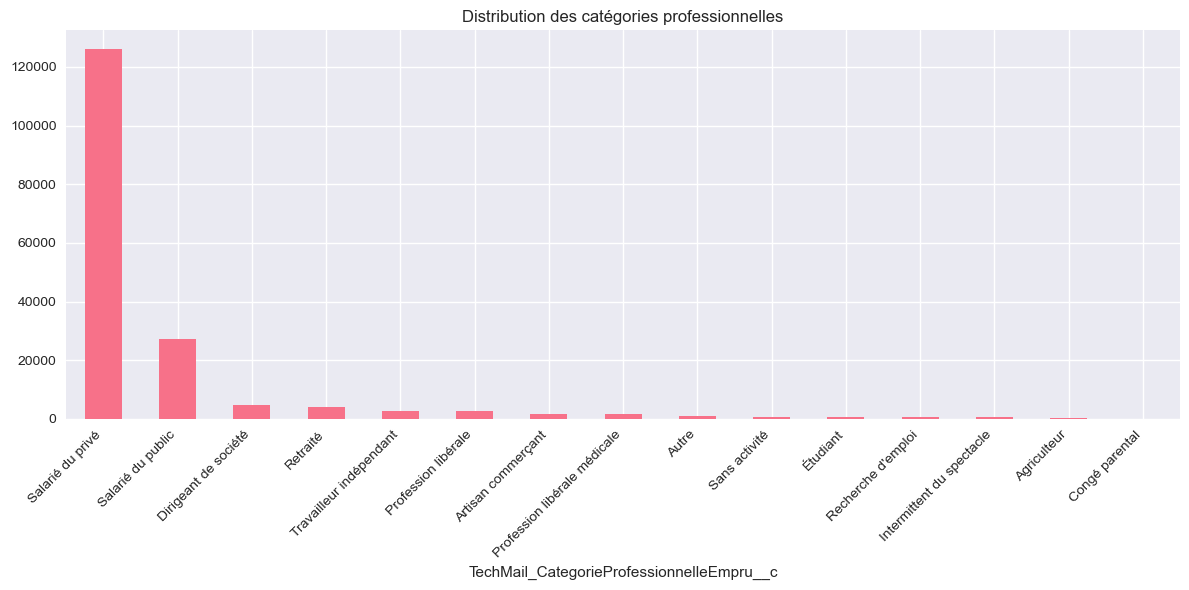

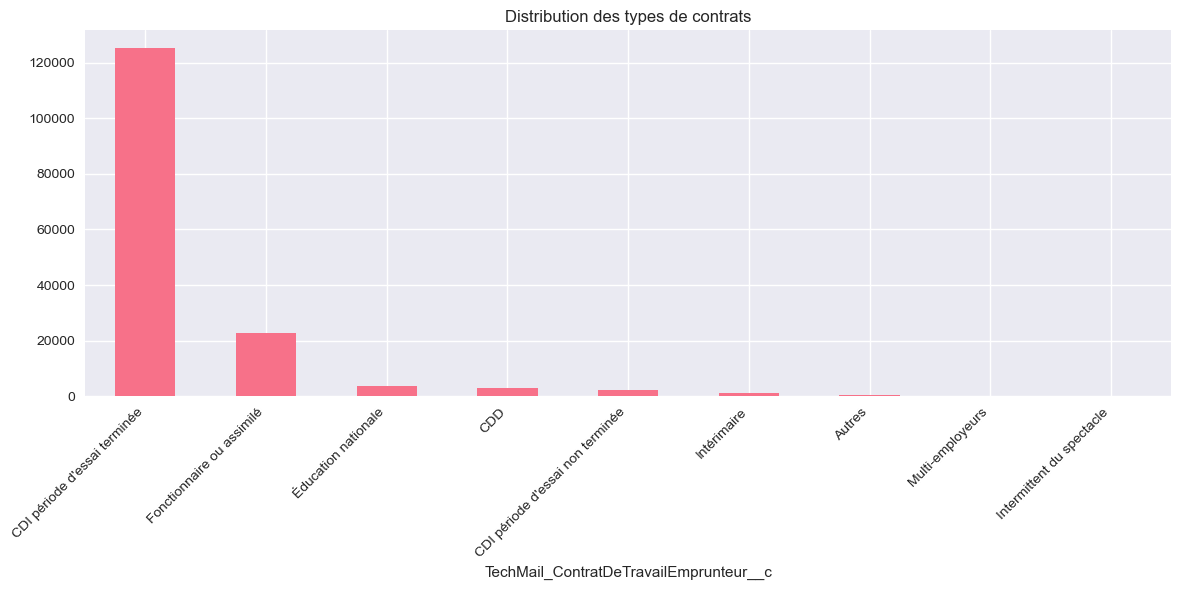

In [9]:
# Catégories professionnelles
plt.figure(figsize=(12, 6))
opportunities['TechMail_CategorieProfessionnelleEmpru__c'].value_counts().plot(kind='bar')
plt.title('Distribution des catégories professionnelles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Types de contrats
plt.figure(figsize=(12, 6))
opportunities['TechMail_ContratDeTravailEmprunteur__c'].value_counts().plot(kind='bar')
plt.title('Distribution des types de contrats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Analyse Corrigée des Revenus des Emprunteurs

### 1.1 Nettoyage et Analyse des Revenus

Statistiques des revenus avant nettoyage :
count    179740.00
mean       4957.57
std        9617.18
min      -14681.00
25%        2484.04
50%        3755.00
75%        5506.66
max     1516666.66
Name: TotRev__c, dtype: float64

Statistiques après nettoyage :
count   169334.00
mean      4554.28
std       2839.90
min          1.00
25%       2600.00
50%       3833.33
75%       5508.33
max      20000.00
Name: TotRev__c, dtype: float64

Analyse par percentiles des revenus :
Percentile 10% : 1950.00€
Percentile 25% : 2600.00€
Percentile 50% : 3833.33€
Percentile 75% : 5508.33€
Percentile 90% : 8023.96€

Statistiques revenus-âge :
             mean  count
RevenuRange             
<2000€      34.53  20333
2000-3000€  35.93  36372
3000-4000€  36.16  34407
4000-5000€  37.05  26440
5000-7000€  38.61  27722
7000-10000€ 40.44  15137
>10000€     42.13   8923


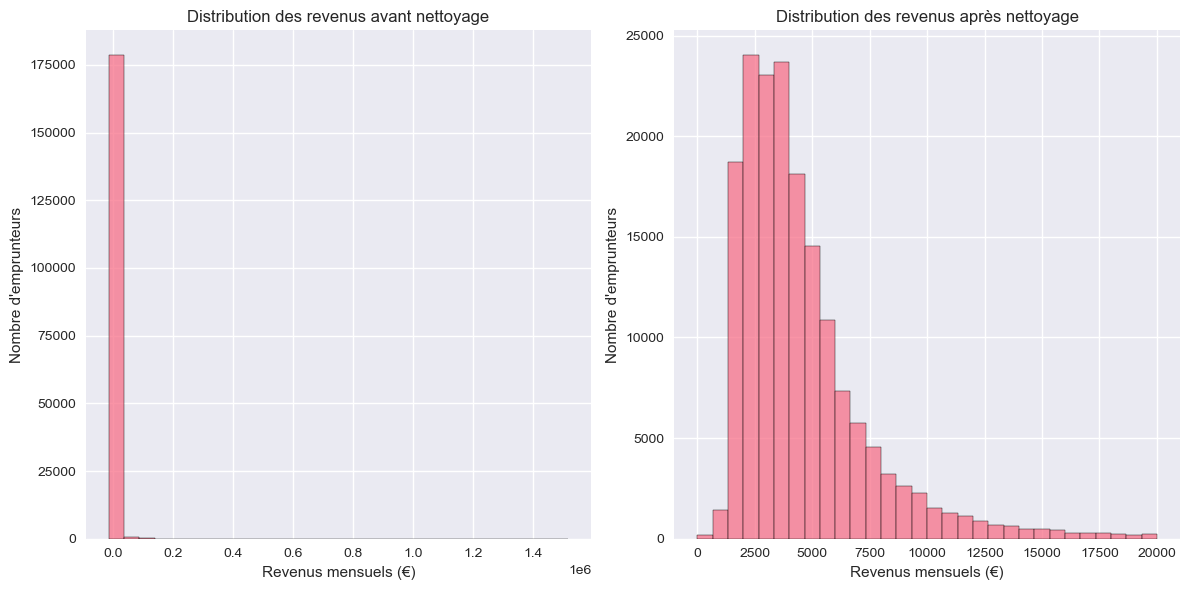

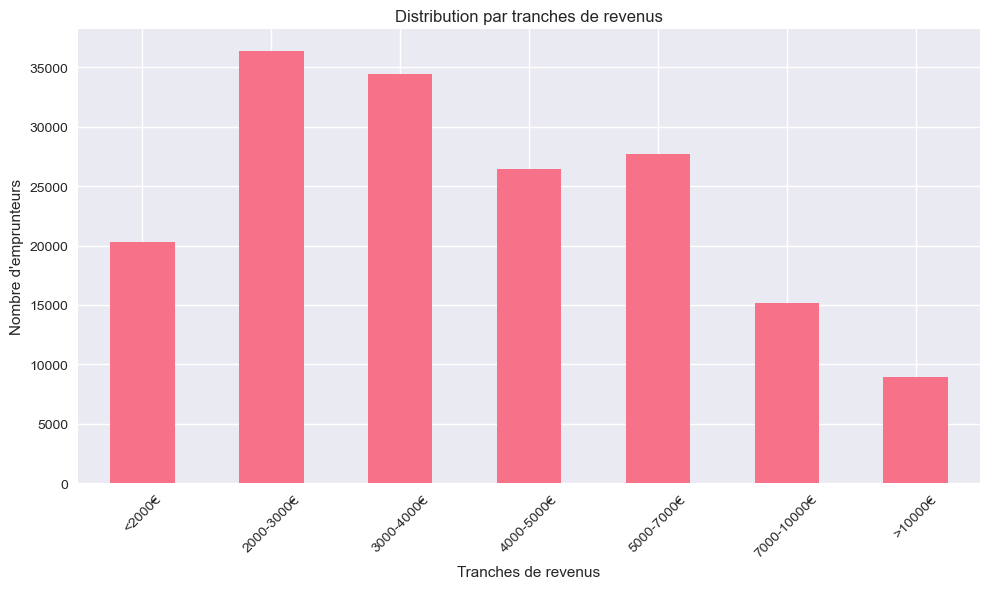

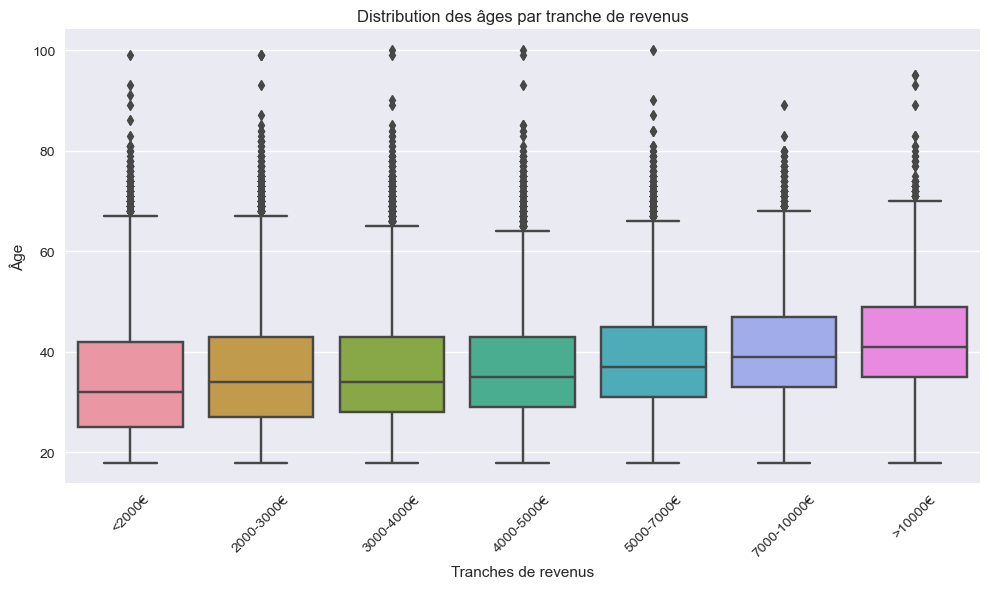

In [10]:

# Utilisons notre dataset déjà nettoyé pour l'âge
print("Statistiques des revenus avant nettoyage :")
print(age_cleaned['TotRev__c'].describe())

# Visualisation de la distribution initiale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=age_cleaned, x='TotRev__c', bins=30)
plt.title('Distribution des revenus avant nettoyage')
plt.xlabel('Revenus mensuels (€)')
plt.ylabel('Nombre d\'emprunteurs')

# Nettoyage des revenus
revenue_cleaned = age_cleaned.copy()
# Définition des critères de filtrage réalistes pour les revenus
revenue_mask = (revenue_cleaned['TotRev__c'] > 0) & (revenue_cleaned['TotRev__c'] <= 20000)
revenue_cleaned = revenue_cleaned[revenue_mask]

# Visualisation après nettoyage
plt.subplot(1, 2, 2)
sns.histplot(data=revenue_cleaned, x='TotRev__c', bins=30)
plt.title('Distribution des revenus après nettoyage')
plt.xlabel('Revenus mensuels (€)')
plt.ylabel('Nombre d\'emprunteurs')
plt.tight_layout()

# Statistiques après nettoyage
print("\nStatistiques après nettoyage :")
print(revenue_cleaned['TotRev__c'].describe())

# Analyse par tranches de revenus
revenue_ranges = [0, 2000, 3000, 4000, 5000, 7000, 10000, 20000]
revenue_labels = ['<2000€', '2000-3000€', '3000-4000€', '4000-5000€', '5000-7000€', '7000-10000€', '>10000€']

revenue_cleaned['RevenuRange'] = pd.cut(revenue_cleaned['TotRev__c'], 
                                      bins=revenue_ranges,
                                      labels=revenue_labels)

# Distribution par tranche de revenus
revenue_distribution = revenue_cleaned['RevenuRange'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
revenue_distribution.plot(kind='bar')
plt.title('Distribution par tranches de revenus')
plt.xlabel('Tranches de revenus')
plt.ylabel('Nombre d\'emprunteurs')
plt.xticks(rotation=45)
plt.tight_layout()

# Calcul des percentiles pour une analyse plus fine
percentiles = [10, 25, 50, 75, 90]
print("\nAnalyse par percentiles des revenus :")
for p in percentiles:
    value = revenue_cleaned['TotRev__c'].quantile(p/100)
    print(f"Percentile {p}% : {value:.2f}€")

# Analyse croisée âge-revenus
plt.figure(figsize=(10, 6))
sns.boxplot(data=revenue_cleaned, x='RevenuRange', y='Age_emprunteur__c')
plt.title('Distribution des âges par tranche de revenus')
plt.xlabel('Tranches de revenus')
plt.ylabel('Âge')
plt.xticks(rotation=45)
plt.tight_layout()

# Calcul des statistiques de revenus moyens par tranche d'âge
age_income_stats = revenue_cleaned.groupby('RevenuRange')['Age_emprunteur__c'].agg(['mean', 'count'])
print("\nStatistiques revenus-âge :")
print(age_income_stats)

# Interprétation des trois visualisations :

**1. Distribution des revenus avant/après nettoyage**

*Avant nettoyage* :
- Concentration massive près de 0€
- Échelle allant jusqu'à 1.4M€ montrant des valeurs aberrantes
- Distribution non exploitable pour l'analyse

*Après nettoyage* (0-20,000€) :
- Distribution plus réaliste et exploitable
- Pic entre 2,000€ et 4,000€
- Queue longue vers les hauts revenus
- Meilleure visibilité de la répartition réelle des revenus

*Pourquoi ce nettoyage ?*
- Élimination des valeurs aberrantes
- Focus sur la plage de revenus réaliste pour les crédits immobiliers
- Meilleure représentativité du marché cible

**2. Distribution par tranches de revenus**

*Analyse des segments* :
- Segment dominant : 2000-3000€ (~36,000 emprunteurs)
- Second segment : 3000-4000€ (~34,000 emprunteurs)
- Décroissance progressive vers les hauts revenus
- Distribution cohérente avec la répartition des salaires en France

*Pourquoi ces tranches ?*
- Correspond aux seuils significatifs pour l'octroi de crédit
- Permet une segmentation claire de la clientèle
- Facilite la création de produits adaptés à chaque segment

**3. Distribution des âges par tranche de revenus (Box Plot)**

*Observations clés* :
- Corrélation positive entre âge et revenus
- Médiane d'âge augmente avec les revenus
- Dispersion plus importante dans les hauts revenus
- Points extrêmes présents dans toutes les tranches

*Pourquoi ce type de visualisation ?*
- Montre la relation âge-revenus de façon claire
- Permet de voir la distribution complète (médiane, quartiles, extrêmes)
- Aide à identifier les profils types par segment
- Utile pour le ciblage marketing et l'analyse des risques

**Implications métier générales**:
1. Segmentation claire pour :
   - Adaptation des produits
   - Ciblage marketing
   - Évaluation des risques
2. Meilleure compréhension du profil type par tranche de revenus
3. Base solide pour la politique de crédit
4. Support pour la formation des conseillers

Cette analyse corrigée des revenus des emprunteurs nous fournit des informations essentielles pour :
1. Cibler efficacement notre clientèle
2. Adapter nos produits et nos offres
3. Évaluer les risques et les opportunités
4. Améliorer la qualité de nos données
---

### 1.2 Résumé des corrections et observations

1. **Corrections appliquées**:
   - Suppression des revenus négatifs
   - Plafonnement à 20,000€ mensuel (seuil réaliste pour les prêts standards)
   - Utilisation des données déjà nettoyées pour l'âge

2. **Impact du nettoyage**:
   - Distribution plus cohérente avec la réalité du marché
   - Meilleure visibilité des segments de revenus
   - Base plus fiable pour l'analyse des capacités d'emprunt

### 1.3 Recommandations pour le système de données

In [11]:
def validate_revenue(revenue):
    """
    Fonction de validation pour les futures saisies de revenus
    """
    if not isinstance(revenue, (int, float)):
        return False
    if revenue <= 0 or revenue > 20000:
        return False
    return True

def analyze_revenue_quality(df):
    """
    Fonction d'analyse de la qualité des données de revenus
    """
    quality_metrics = {
        'revenus_negatifs': len(df[df['TotRev__c'] < 0]),
        'revenus_suspects': len(df[df['TotRev__c'] > 20000]),
        'revenus_nuls': len(df[df['TotRev__c'] == 0])
    }
    return quality_metrics

### 1.4 Implications métier

1. **Segments de clientèle identifiés**:

In [12]:
def segment_clients_by_revenue(df):
    """
    Segmentation de la clientèle par revenus
    """
    segments = {
        'standard': len(df[(df['TotRev__c'] >= 2000) & (df['TotRev__c'] < 4000)]),
        'premium': len(df[(df['TotRev__c'] >= 4000) & (df['TotRev__c'] < 7000)]),
        'luxe': len(df[df['TotRev__c'] >= 7000])
    }
    return segments


---
---
### 1.5 Analyse des banques principales

Identifions les banques les plus représentées parmi les emprunteurs.

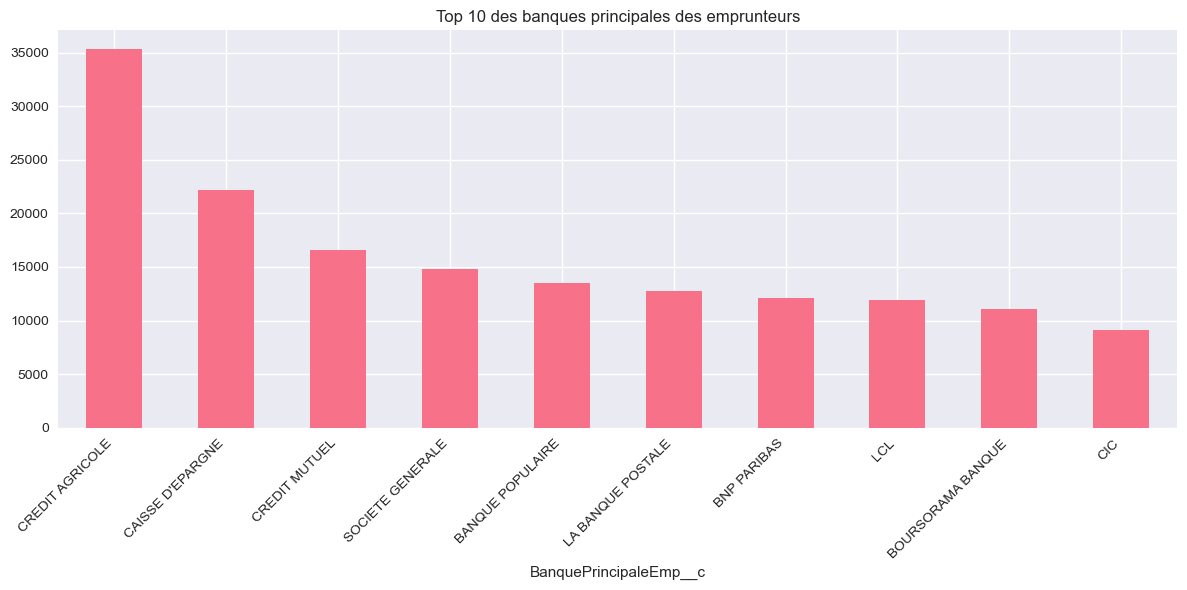

In [13]:
plt.figure(figsize=(12, 6))
opportunities['BanquePrincipaleEmp__c'].value_counts().head(10).plot(kind='bar')
# un plot en camembert serait plus adapté
#opportunities['BanquePrincipaleEmp__c'].value_counts().head(10).plot(kind='pie', autopct='%10.1f%%') # autopct='%5.1f%% 
plt.title('Top 10 des banques principales des emprunteurs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

---
---

## Nettoyage 

In [14]:
# Vérifions les différences
print("Nombre d'observations dans le dataset original:", len(opportunities))
print("Nombre d'observations après nettoyage des âges:", len(age_cleaned))
print("Différence:", len(opportunities) - len(age_cleaned))

# Vérifions si les revenus moyens ont changé
print("\nRevenu moyen original:", opportunities['TotRev__c'].mean())
print("Revenu moyen après nettoyage âge:", age_cleaned['TotRev__c'].mean())

# Vérifions la corrélation âge-revenu dans les deux datasets
corr_original = opportunities[['Age_emprunteur__c', 'TotRev__c']].corr()
corr_cleaned = age_cleaned[['Age_emprunteur__c', 'TotRev__c']].corr()
print("\nCorrélation dans dataset original:\n", corr_original)
print("\nCorrélation dans dataset nettoyé:\n", corr_cleaned)

Nombre d'observations dans le dataset original: 183496
Nombre d'observations après nettoyage des âges: 179740
Différence: 3756

Revenu moyen original: 4894.850482299341
Revenu moyen après nettoyage âge: 4957.571834093691

Corrélation dans dataset original:
                    Age_emprunteur__c  TotRev__c
Age_emprunteur__c               1.00       0.07
TotRev__c                       0.07       1.00

Corrélation dans dataset nettoyé:
                    Age_emprunteur__c  TotRev__c
Age_emprunteur__c               1.00       0.07
TotRev__c                       0.07       1.00


In [15]:
# Approche plus rigoureuse
opportunities_clean = opportunities.copy()

# 1. Nettoyage des âges
age_mask = (opportunities_clean['Age_emprunteur__c'] >= 18) & \
           (opportunities_clean['Age_emprunteur__c'] <= 100)

# 2. Nettoyage des revenus
revenue_mask = (opportunities_clean['TotRev__c'] > 0) & \
               (opportunities_clean['TotRev__c'] <= 20000)

# Application des deux filtres
opportunities_clean = opportunities_clean[age_mask & revenue_mask]

# Vérification de l'impact
print("Observations après double nettoyage:", len(opportunities_clean))

Observations après double nettoyage: 169334


## Synthèse du Profil Type

Basé sur notre analyse, voici le profil type de l'emprunteur Meilleurtaux :

In [16]:
# Chargement des données nettoyées
opportunities_clean = pd.read_csv('../data_sources/gold/opportunities_cleaned.csv')

# Calcul des statistiques pour le profil type avec les données nettoyées
profile_stats_clean = {
    'age_median': opportunities_clean['Age_emprunteur__c'].median(),
    'revenu_median': opportunities_clean['TotRev__c'].median(),
    'categorie_pro_principale': opportunities_clean['TechMail_CategorieProfessionnelleEmpru__c'].mode()[0],
    'contrat_principal': opportunities_clean['TechMail_ContratDeTravailEmprunteur__c'].mode()[0],
    'banque_principale': opportunities_clean['BanquePrincipaleEmp__c'].mode()[0]
}

print("Profil type de l'emprunteur (données nettoyées):")
for key, value in profile_stats_clean.items():
    print(f"- {key}: {value}")

# Analyses complémentaires
print("\nDistribution détaillée :")

# Catégories professionnelles
print("\nTop 5 des catégories professionnelles :")
print(opportunities_clean['TechMail_CategorieProfessionnelleEmpru__c'].value_counts().head())

# Types de contrats
print("\nTop 5 des types de contrats :")
print(opportunities_clean['TechMail_ContratDeTravailEmprunteur__c'].value_counts().head())

# Banques principales
print("\nTop 5 des banques principales :")
print(opportunities_clean['BanquePrincipaleEmp__c'].value_counts().head())

# Statistiques descriptives âge et revenus
print("\nStatistiques détaillées âge et revenus :")
print(opportunities_clean[['Age_emprunteur__c', 'TotRev__c']].describe())

Profil type de l'emprunteur (données nettoyées):
- age_median: 35.0
- revenu_median: 3833.33
- categorie_pro_principale: Salarié du privé
- contrat_principal: CDI période d'essai terminée
- banque_principale: CREDIT AGRICOLE

Distribution détaillée :

Top 5 des catégories professionnelles :
TechMail_CategorieProfessionnelleEmpru__c
Salarié du privé           121216
Salarié du public           26229
Dirigeant de société         4409
Retraité                     3938
Travailleur indépendant      2647
Name: count, dtype: int64

Top 5 des types de contrats :
TechMail_ContratDeTravailEmprunteur__c
CDI période d'essai terminée        120478
Fonctionnaire ou assimilé            22007
Éducation nationale                   3484
CDD                                   2854
CDI période d'essai non terminée      2123
Name: count, dtype: int64

Top 5 des banques principales :
BanquePrincipaleEmp__c
CREDIT AGRICOLE     34018
CAISSE D'EPARGNE    21394
CREDIT MUTUEL       15993
SOCIETE GENERALE    14238

## Interprétation complète des résultats basée sur les données nettoyées.

**1. Profil Type de l'Emprunteur**
- **Âge médian** : 35 ans, ce qui indique une clientèle relativement jeune
- **Revenu médian** : 3,833.33€, représentatif de la classe moyenne française
- **Profil professionnel** : Salarié du privé en CDI hors période d'essai
- **Relation bancaire** : Principal partenaire = Crédit Agricole

**2. Analyse Détaillée des Caractéristiques**

*Répartition Professionnelle* :
- Dominance forte du secteur privé (121,216 emprunteurs)
- Secteur public bien représenté (26,229 emprunteurs)
- Proportion significative de profils "sûrs" (dirigeants, fonctionnaires)
- Structure pyramidale claire des catégories professionnelles

*Types de Contrats* :
- Très forte prépondérance des CDI (120,478 emprunteurs)
- Position forte des fonctionnaires (22,007 emprunteurs)
- Faible représentation des contrats précaires (CDD : 2,854)
- Focus clair sur la stabilité professionnelle

*Distribution Bancaire* :
1. Crédit Agricole (34,018 clients)
2. Caisse d'Épargne (21,394 clients)
3. Crédit Mutuel (15,993 clients)
- Domination des banques mutualistes

**3. Statistiques Clés**

*Distribution des Âges* :
- Moyenne : 37.15 ans
- 50% des emprunteurs entre 29 et 44 ans
- Écart-type de 10.69 ans indiquant une concentration autour de la moyenne

*Distribution des Revenus* :
- Moyenne : 4,554.28€
- 50% des revenus entre 2,600€ et 5,508.33€
- Écart-type important (2,839.90€) indiquant une diversité des profils

**4. Implications Métier**

1. *Segmentation Client* :
   - Segment principal : 29-44 ans, CDI, revenus moyens
   - Segment secondaire : Fonctionnaires et professions stables
   - Segment premium : Dirigeants et hauts revenus

2. *Stratégie Commerciale* :
   - Focus sur les partenariats avec les banques mutualistes
   - Produits adaptés à la classe moyenne active
   - Opportunités sur le segment des jeunes actifs

3. *Gestion des Risques* :
   - Base clientèle majoritairement stable (CDI, fonctionnaires)
   - Revenus permettant des capacités d'emprunt standards
   - Profils majoritairement peu risqués

**5. Recommandations**

1. *Développement Produit* :
   - Offres spécifiques pour les 30-40 ans
   - Solutions adaptées aux revenus 2,500€-5,500€
   - Packages spéciaux pour les fonctionnaires

2. *Marketing* :
   - Ciblage principal sur les salariés du privé en CDI
   - Communication adaptée aux banques mutualistes
   - Développement des partenariats bancaires majeurs

3. *Expansion* :
   - Potentiel de développement sur les CDD stables
   - Opportunités sur le segment des indépendants
   - Diversification possible vers les hauts revenus

Ces données nettoyées nous donnent une vision plus précise et fiable du marché cible, permettant une meilleure adaptation des stratégies commerciales et des produits.

## Partie 2: Analyse des Propositions Les Plus Avantageuses

Pour cette partie, nous allons créer une requête SQL, mais comme nous sommes dans Python, nous allons l'implémenter avec pandas. Voici comment calculer le coût total et identifier la meilleure proposition :

In [19]:
def calculate_total_cost(row):
    """
    Calcule le coût total du prêt en incluant les intérêts et l'assurance
    """
    principal = row['MontPretPricip__c']
    rate = row['TXHA__c'] / 100  # Conversion en décimal
    insurance_rate = row['TauxAss__c'] / 100  # Conversion en décimal
    months = row['DureePret_Mois__c']
    
    if rate == 0:
        # Si le taux d'intérêt est zéro, le paiement mensuel est simplement le principal divisé par le nombre de mois
        monthly_payment = principal / months
    else:
        # Calcul du coût mensuel (Principal + Intérêts)
        monthly_rate = rate / 12
        monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**months) / ((1 + monthly_rate)**months - 1)
    
    # Coût de l'assurance mensuel
    monthly_insurance = principal * (insurance_rate / 12)
    
    # Coût total sur la durée du prêt
    total_cost = (monthly_payment + monthly_insurance) * months - principal
    
    return total_cost

# Fusion des données
merged_data = propositions.merge(opportunities_clean[['Id', 'MontPretPricip__c']], 
                               left_on='Opportunity__c', 
                               right_on='Id', 
                               how='left')
merged_data = merged_data.merge(banques[['Id', 'Name']], 
                              left_on='Partenaire__c', 
                              right_on='Id', 
                              how='left')

# Calcul du coût total pour chaque proposition
merged_data['total_cost'] = merged_data.apply(calculate_total_cost, axis=1)

# Sélection de la meilleure proposition par opportunité
best_proposals = merged_data.sort_values('total_cost').groupby('Opportunity__c').first()

# Sélection des colonnes demandées
result = best_proposals[['Id_x', 'TXHA__c', 'DureePret_Mois__c', 'Name']].reset_index()
result.columns = ['ID_Opportunite', 'ID_Proposition', 'Taux_Interet', 'Duree_Pret', 'Nom_Banque']

print("Aperçu des meilleures propositions:")
print(result.head())

Aperçu des meilleures propositions:
       ID_Opportunite      ID_Proposition  Taux_Interet  Duree_Pret  \
0  0061i000006nZt4AAE  a0PIV000009xQ1J2AU          3.25      300.00   
1  0061i00000A6jkHAAR  a0PIV00000A5RHx2AN          2.07      180.00   
2  0061i00000DQe7mAAD  a0PIV000009tu1B2AQ          4.15      144.00   
3  0061i00000DQsSuAAL  a0PIV00000A1aYM2AZ          3.60      180.00   
4  0061i00000Dv2rhAAB  a0PIV000009tU6m2AE          3.70      300.00   

                                          Nom_Banque  
0                                               None  
1                   CAISSE D'EPARGNE NORMANDIE ROUEN  
2                                               None  
3  LA BANQUE POSTALE MAISON DE L'HABITAT MONTPELLIER  
4                                  LCL DDR IDF OUEST  


## Conclusion

Cette analyse nous a permis de :
1. Établir un profil type détaillé des emprunteurs
2. Identifier les propositions les plus avantageuses pour chaque opportunité

Les insights clés peuvent être utilisés pour :
- Mieux cibler les campagnes marketing
- Optimiser les propositions de prêt
- Améliorer le processus de matching entre emprunteurs et banques